<a href="https://colab.research.google.com/github/nimajr/MachineLearning2023/blob/main/HW1/Q2/Q2_extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-2-230f7b003ead>:38: RuntimeWarning: overflow encountered in matmul
  gradient = (X.T @ errors) / m
<ipython-input-2-230f7b003ead>:45: RuntimeWarning: invalid value encountered in subtract
  weights -= learning_rate * gradient


L2 Regularization:
Train Error (MSE): nan
Test Error (MSE): nan

L1 Regularization:
Train Error (MSE): nan
Test Error (MSE): nan



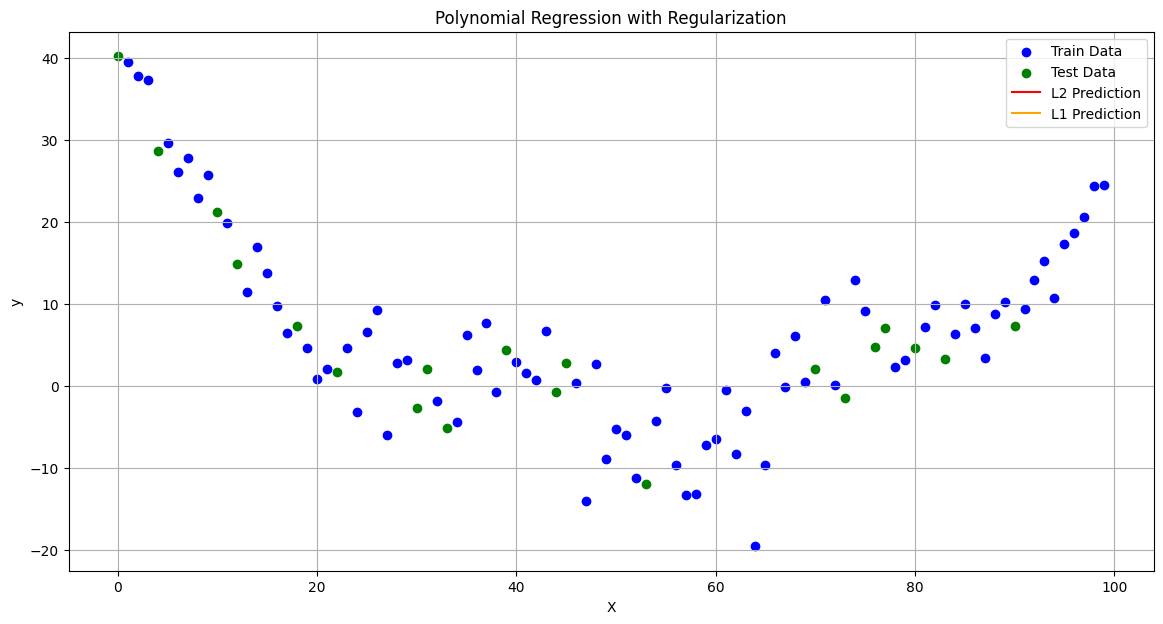

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# بارگذاری داده‌ها
data = np.load('/content/data.npy', allow_pickle=True)

# تقسیم داده‌ها به ویژگی‌ها (X) و مقادیر هدف (y)
X = np.arange(len(data)).reshape(-1, 1)  # ویژگی‌ها (ایندکس داده‌ها)
y = data  # مقادیر هدف

# تقسیم داده‌ها به مجموعه آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تبدیل داده‌ها به ویژگی‌های چندجمله‌ای
def polynomial_features(X, degree):
    return np.hstack([X ** i for i in range(degree + 1)])

# تابع خطای مربعات با Regularization
def compute_cost_with_regularization(X, y, weights, lambd, regularization='L2'):
    predictions = X @ weights
    errors = y - predictions
    mse = np.mean(errors ** 2)
    if regularization == 'L2':
        penalty = lambd * np.sum(weights[1:] ** 2)  # جریمه L2 (ضرایب بدون بایاس)
    elif regularization == 'L1':
        penalty = lambd * np.sum(np.abs(weights[1:]))  # جریمه L1
    else:
        penalty = 0  # بدون regularization
    return mse + penalty

# گرادیان نزولی برای آموزش مدل
def gradient_descent_with_regularization(X, y, weights, learning_rate, lambd, regularization='L2', epochs=1000):
    m = len(y)
    for epoch in range(epochs):
        predictions = X @ weights
        errors = predictions - y
        gradient = (X.T @ errors) / m

        if regularization == 'L2':
            gradient[1:] += 2 * lambd * weights[1:] / m  # جریمه L2
        elif regularization == 'L1':
            gradient[1:] += lambd * np.sign(weights[1:]) / m  # جریمه L1

        weights -= learning_rate * gradient
    return weights

# تنظیمات مدل
degree = 5  # درجه چندجمله‌ای
lambd = 0.1  # مقدار regularization
learning_rate = 0.01
epochs = 2000

# ساخت ویژگی‌های چندجمله‌ای
X_train_poly = polynomial_features(X_train, degree)
X_test_poly = polynomial_features(X_test, degree)

# مقداردهی اولیه ضرایب
weights = np.random.randn(X_train_poly.shape[1])

# آموزش مدل با regularization
weights_l2 = gradient_descent_with_regularization(X_train_poly, y_train, weights, learning_rate, lambd, 'L2')
weights_l1 = gradient_descent_with_regularization(X_train_poly, y_train, weights, learning_rate, lambd, 'L1')

# پیش‌بینی
y_train_pred_l2 = X_train_poly @ weights_l2
y_test_pred_l2 = X_test_poly @ weights_l2
y_train_pred_l1 = X_train_poly @ weights_l1
y_test_pred_l1 = X_test_poly @ weights_l1

# محاسبه خطا
mse_train_l2 = compute_cost_with_regularization(X_train_poly, y_train, weights_l2, lambd, 'L2')
mse_test_l2 = compute_cost_with_regularization(X_test_poly, y_test, weights_l2, lambd, 'L2')
mse_train_l1 = compute_cost_with_regularization(X_train_poly, y_train, weights_l1, lambd, 'L1')
mse_test_l1 = compute_cost_with_regularization(X_test_poly, y_test, weights_l1, lambd, 'L1')

# نتایج
print(f"L2 Regularization:\nTrain Error (MSE): {mse_train_l2}\nTest Error (MSE): {mse_test_l2}\n")
print(f"L1 Regularization:\nTrain Error (MSE): {mse_train_l1}\nTest Error (MSE): {mse_test_l1}\n")

# رسم نمودار
plt.figure(figsize=(14, 7))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, y_train_pred_l2, color='red', label='L2 Prediction')
plt.plot(X_train, y_train_pred_l1, color='orange', label='L1 Prediction')
plt.title('Polynomial Regression with Regularization')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


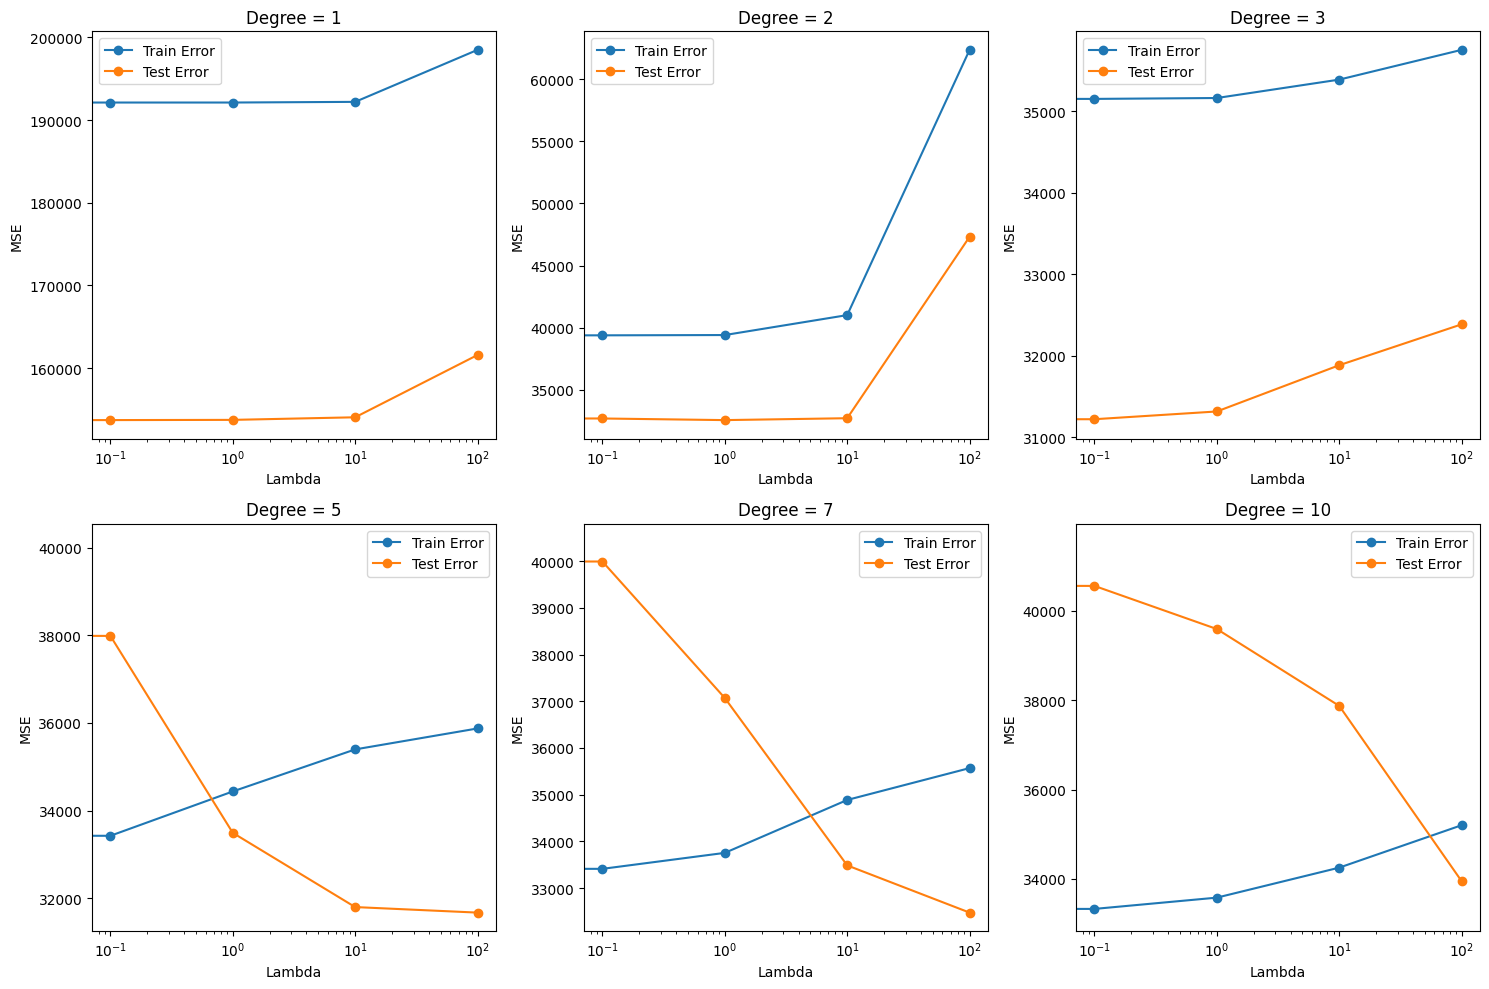

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 3 * x**3 - 5 * x**2 + 2 * x + 7 + np.random.normal(0, 200, size=len(x))

# Split data into training and testing
train_ratio = 0.8
split_index = int(train_ratio * len(x))
indices = np.random.permutation(len(x))
train_indices, test_indices = indices[:split_index], indices[split_index:]
x_train, y_train = x[train_indices], y[train_indices]
x_test, y_test = x[test_indices], y[test_indices]

# Polynomial regression with regularization
def polynomial_regression(x, y, degree, lambd):
    X = np.vstack([x**i for i in range(degree + 1)]).T
    reg_matrix = lambd * np.eye(X.shape[1])
    reg_matrix[0, 0] = 0  # No regularization for the bias term
    theta = np.linalg.inv(X.T @ X + reg_matrix) @ X.T @ y
    return theta

# Evaluate model performance
def evaluate_model(theta, x, y, degree):
    X = np.vstack([x**i for i in range(degree + 1)]).T
    predictions = X @ theta
    mse = np.mean((predictions - y)**2)
    return mse, predictions

# Experiment with degrees and lambda values
degrees = [1, 2, 3, 5, 7, 10]
lambdas = [0, 0.1, 1, 10, 100]
results = []

for degree in degrees:
    train_errors, test_errors = [], []
    for lambd in lambdas:
        theta = polynomial_regression(x_train, y_train, degree, lambd)
        train_mse, _ = evaluate_model(theta, x_train, y_train, degree)
        test_mse, predictions = evaluate_model(theta, x_test, y_test, degree)
        train_errors.append(train_mse)
        test_errors.append(test_mse)
    results.append((degree, train_errors, test_errors))

# Plot results
plt.figure(figsize=(15, 10))
for i, (degree, train_errors, test_errors) in enumerate(results):
    plt.subplot(2, 3, i + 1)
    plt.plot(lambdas, train_errors, label='Train Error', marker='o')
    plt.plot(lambdas, test_errors, label='Test Error', marker='o')
    plt.title(f'Degree = {degree}')
    plt.xlabel('Lambda')
    plt.ylabel('MSE')
    plt.xscale('log')
    plt.legend()
plt.tight_layout()
plt.show()
